In [1]:
# Developed by: Priyanka A
# Register No: 212222230113
## Load the dataset from the tensorflow library.
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [2]:
## Preprocess the dataset.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape

X_test.shape

11490434/11490434 [==============================] - 1s 0us/step


(10000, 28, 28)

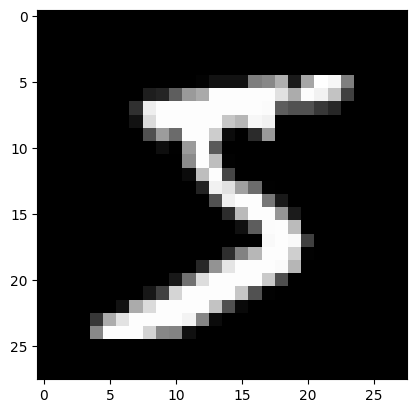

In [3]:
single_image= X_train[0]

single_image.shape

plt.imshow(single_image,cmap='gray')

In [4]:
y_train.shape

X_train.min()

X_train.max()

255

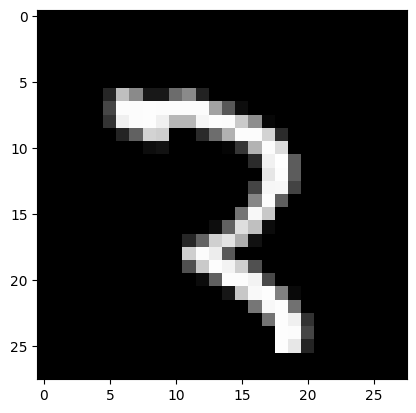

In [6]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

X_train_scaled.min()

X_train_scaled.max()

y_train[0]

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

type(y_train_onehot)

y_train_onehot.shape

single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

y_train_onehot[500]

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [7]:
## Create and train your model.
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [9]:
## Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [10]:
## Fit the model
model.fit(X_train_scaled ,y_train_onehot, epochs=8,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/8
469/469 [==============================] - 29s 58ms/step - loss: 0.3232 - accuracy: 0.9056 - val_loss: 0.1276 - val_accuracy: 0.9613
Epoch 2/8
469/469 [==============================] - 20s 44ms/step - loss: 0.0991 - accuracy: 0.9707 - val_loss: 0.0851 - val_accuracy: 0.9727
Epoch 3/8
469/469 [==============================] - 27s 58ms/step - loss: 0.0674 - accuracy: 0.9800 - val_loss: 0.0612 - val_accuracy: 0.9802
Epoch 4/8
469/469 [==============================] - 23s 50ms/step - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.0531 - val_accuracy: 0.9824
Epoch 5/8
469/469 [==============================] - 24s 52ms/step - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0499 - val_accuracy: 0.9830
Epoch 6/8
469/469 [==============================] - 32s 68ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0452 - val_accuracy: 0.9850
Epoch 7/8
469/469 [==============================] - 27s 57ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0503 - val_accuracy: 0.9829

In [11]:
## Include the training loss, validation loss vs iteration plot.
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.323248,0.905583,0.127637,0.9613
1,0.099109,0.970683,0.085088,0.9727
2,0.067369,0.979950,0.061178,0.9802
3,0.050249,0.985133,0.053124,0.9824
4,0.041513,0.987200,0.049922,0.9830


Priyanka A - 212222230113


<Axes: >

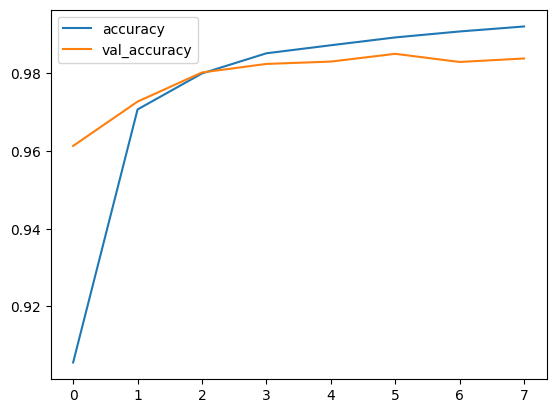

In [12]:
print("Priyanka A - 212222230113")
metrics[['accuracy','val_accuracy']].plot()

Priyanka A - 212222230113


<Axes: >

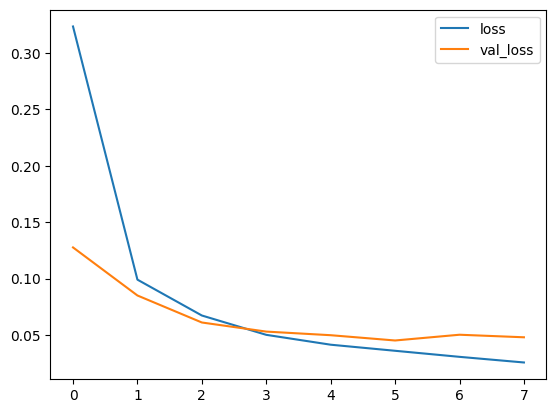

In [13]:
print("Priyanka A - 212222230113")
metrics[['loss','val_loss']].plot()

In [14]:
## Test the model for your handwritten scanned images.
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [15]:
print("Priyanka A - 212222230113")
print(confusion_matrix(y_test,x_test_predictions))

Priyanka A - 212222230113
[[ 972    1    0    0    0    2    4    1    0    0]
 [   0 1128    3    0    0    0    1    2    1    0]
 [   2    1 1018    0    2    0    2    5    2    0]
 [   0    0    3 1000    0    2    0    2    3    0]
 [   0    0    3    0  972    0    3    0    0    4]
 [   2    0    0   13    0  867    7    0    2    1]
 [   5    5    1    0    1    1  944    0    1    0]
 [   0    2    8    0    0    0    0 1017    1    0]
 [   6    1    7    2    3    0    0    8  944    3]
 [   3    2    0    4    8    3    0   11    2  976]]


In [16]:
print("Priyanka A - 212222230113")
print(classification_report(y_test,x_test_predictions))

Priyanka A - 212222230113
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [17]:
# Prediction for a single input
img = image.load_img('3.jpg')
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [18]:
img = image.load_img('3.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

print(x_single_prediction)

1/1 [==============================] - 0s 28ms/step
[2]


Priyanka A - 212222230113
1/1 [==============================] - 0s 21ms/step


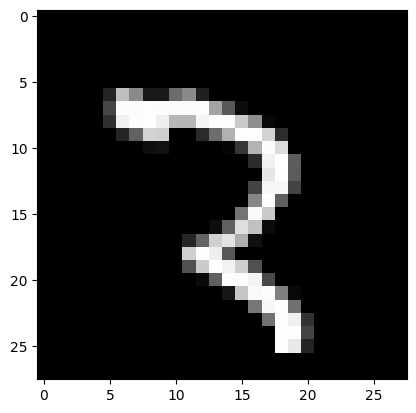

In [19]:
print("Priyanka A - 212222230113")plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [20]:
print("Priyanka A - 212222230113")
print(x_single_prediction)

Priyanka A - 212222230113
[2]
